####  Curated By - Paritosh Sinha

## Part 1: Predicting Customer Churn using Neural Networks

#### Importing the necessary library

In [1]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
import torch
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
torch.manual_seed(0)

# Set seed for reproducibility
SEED = 1234
np.random.seed(SEED)
random.seed(SEED)



#### Importing the Dataset

In [2]:
df_Churn = pd.read_csv('./Telco-Customer-Churn.csv', header=0) # load
df_Churn = df_Churn.sample(frac=1).reset_index(drop=True) # shuffle
df_Churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,8591-NXRCV,Female,0,No,No,41,Yes,Yes,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),74.65,3090.65,No
1,0820-FNRNX,Male,0,Yes,Yes,17,Yes,Yes,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,66.70,1077.05,No
2,4121-AGSIN,Female,0,Yes,Yes,58,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),24.50,1497.9,No
3,7767-UXAGJ,Male,0,No,No,1,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,50.45,50.45,Yes
4,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes


### 1. Exploratory data analysis

In [3]:
#Shape of the dataset
print("rows:",df_Churn.shape[0]," columns:", df_Churn.shape[1])

rows: 7043  columns: 21


In [4]:
#Total number of null values in the dataset
total = df_Churn.isnull().sum()
print("Null values in the dataset:", "\n",total)

Null values in the dataset: 
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [5]:
#About the features of the dataset
df_Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Convert "TotalCharges" column from object to float
df_Churn['TotalCharges'] = pd.to_numeric(df_Churn['TotalCharges'], errors='coerce')

# Check the data types after conversion
print(df_Churn.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [7]:
#Statistics for the numerical columns
df_Churn.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


### Data Visualisation

5174
Yes %: 26.536987079369588 - No %: 73.4630129206304


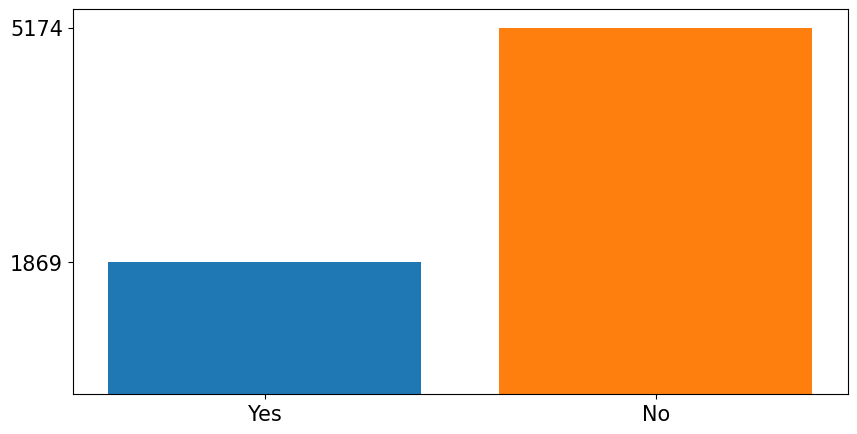

In [8]:
    #Checking the distribution of both the classes in the label
target = df_Churn["Churn"]
Yes = target[target == "Yes"].count()
No = target[target == "No"].count()
print(No)

print("Yes %: " + str(Yes/len(target)*100) + " - No %: " + str(No/len(target)*100))


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
plt.bar("Yes", Yes)
plt.bar("No", No)
ax.set_yticks([Yes,No])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

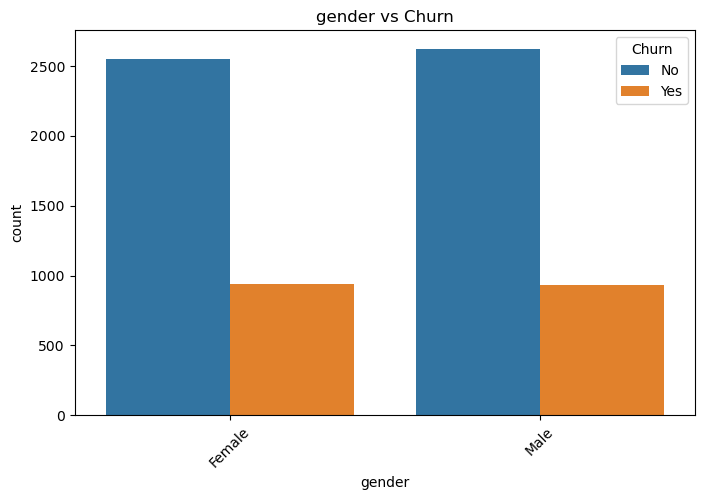

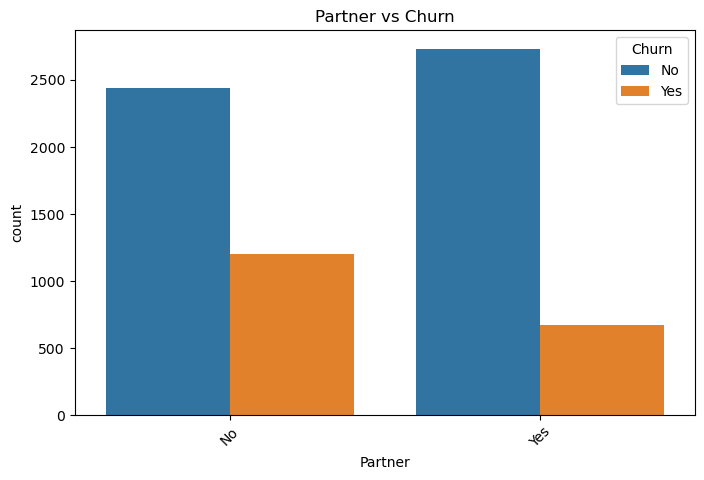

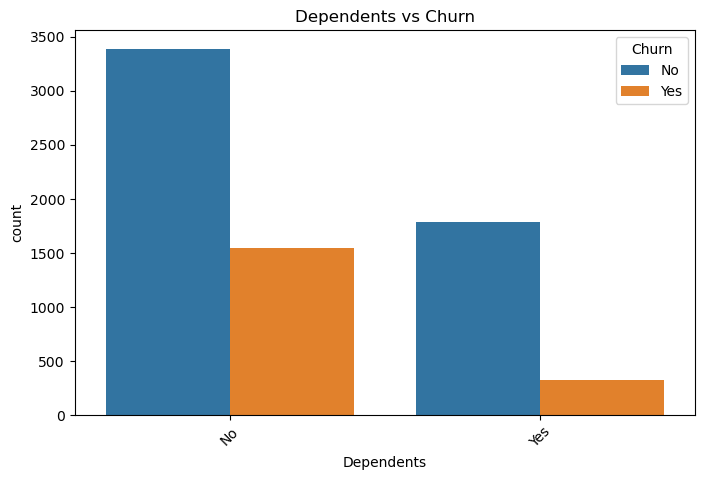

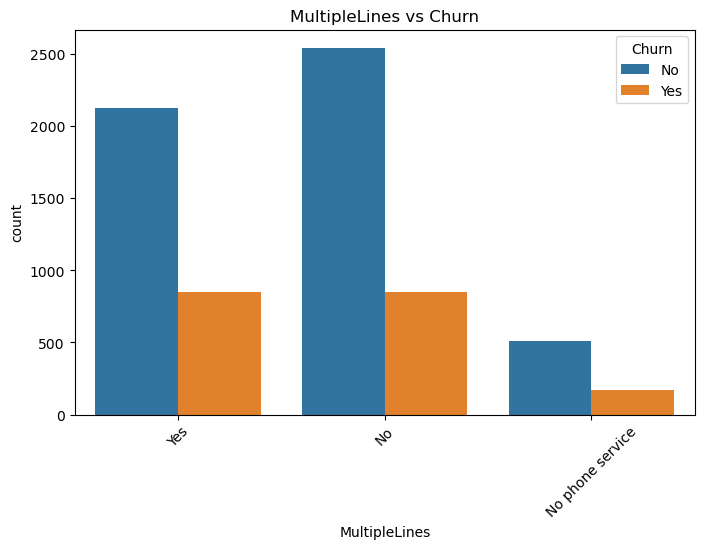

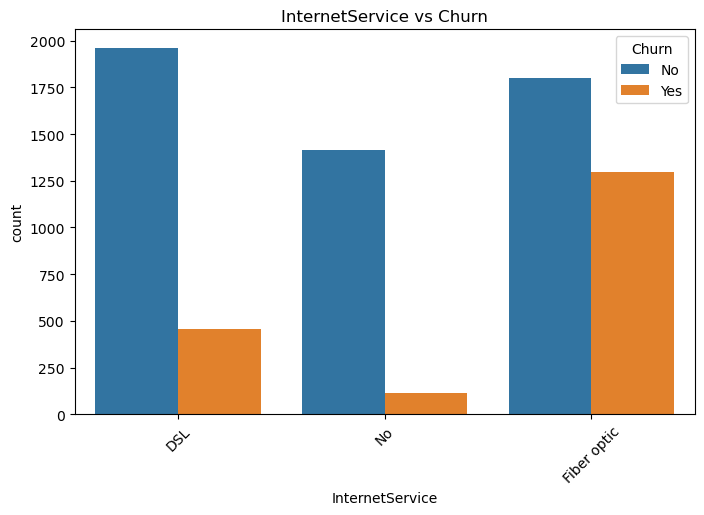

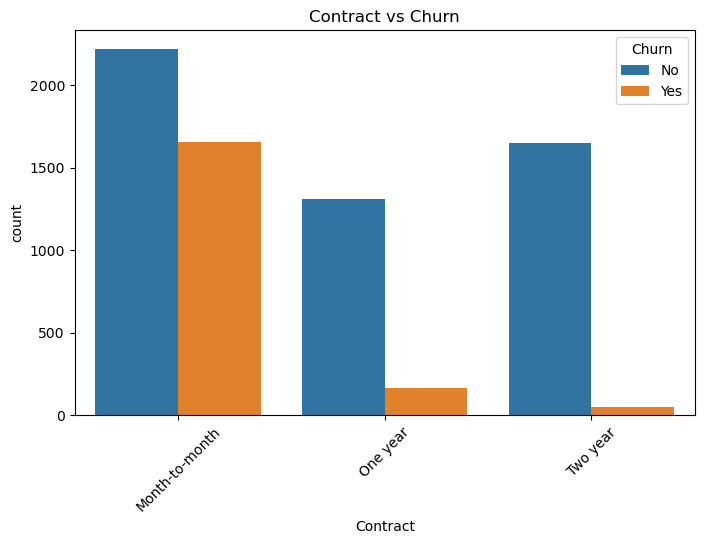

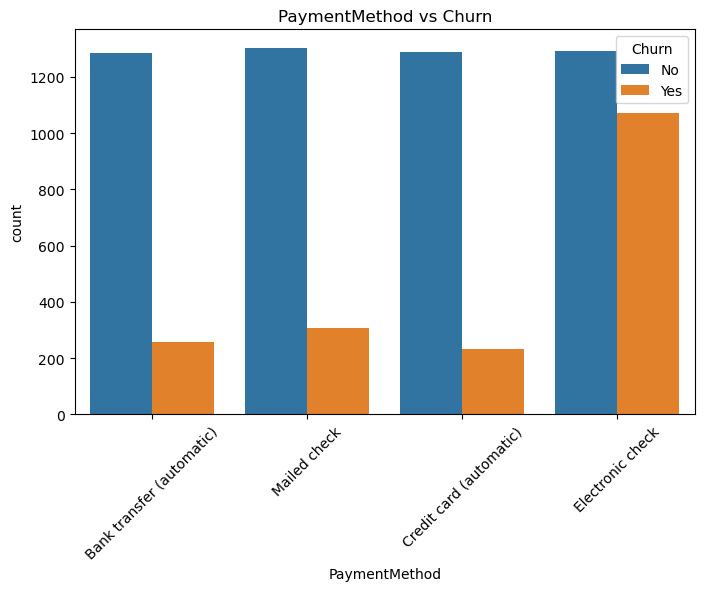

In [9]:
#Categorical Variables - Plots
categorical_cols = ['gender', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Churn', data=df_Churn)
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.show()


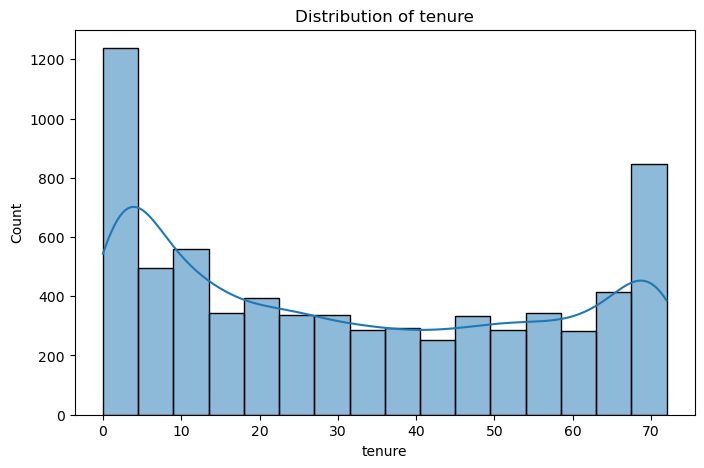

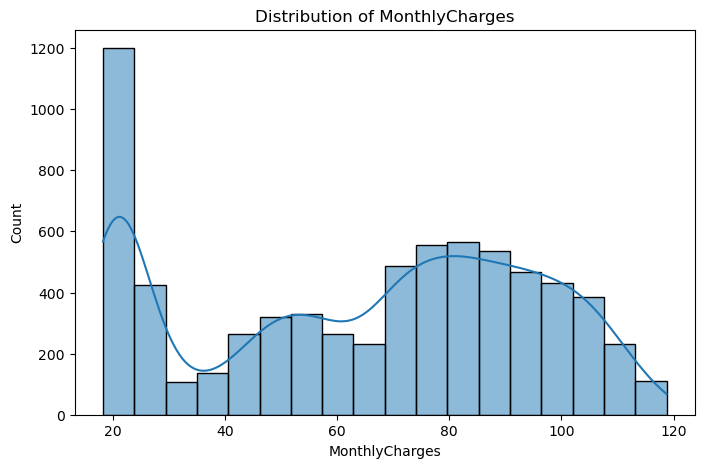

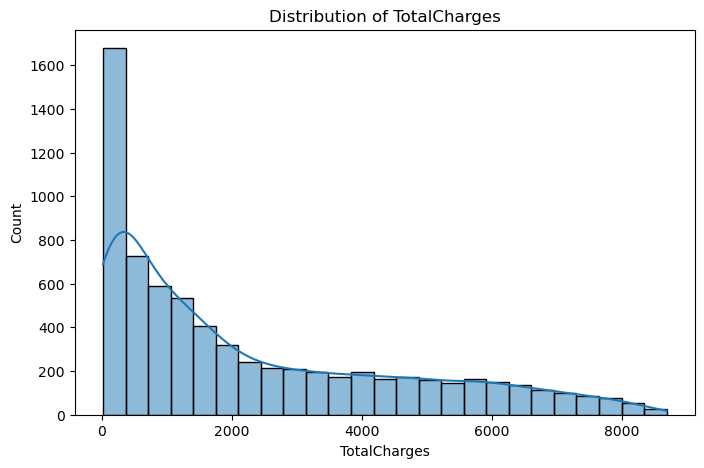

In [10]:
# Numerical Variables - Plots
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_Churn[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

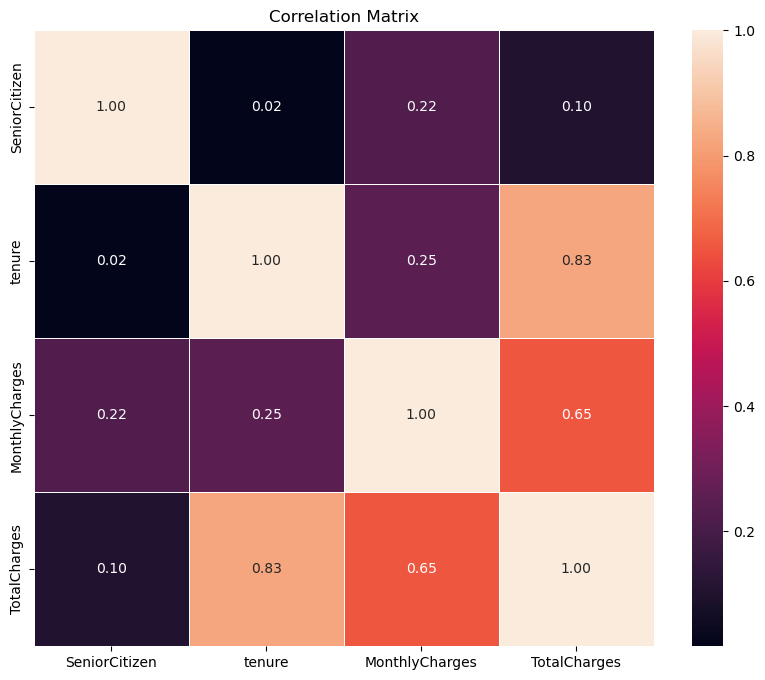

In [11]:
# Correlation Analysis - Numerical variables
plt.figure(figsize=(10, 8))
correlation_matrix = df_Churn.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

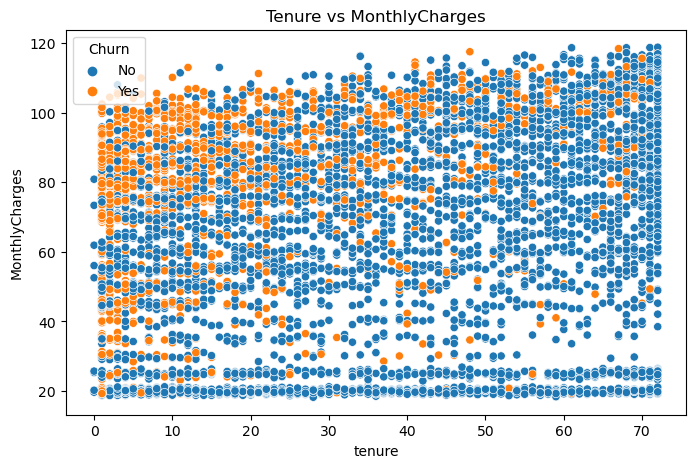

In [12]:
# Checking for relation of tenure vs monthly charges
plt.figure(figsize=(8, 5))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df_Churn)
plt.title('Tenure vs MonthlyCharges')
plt.show()

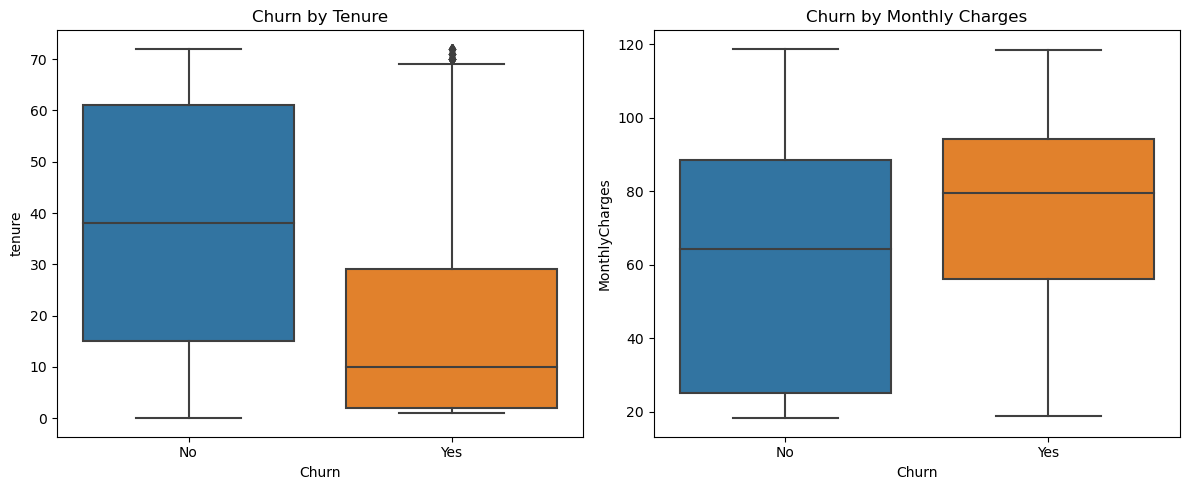

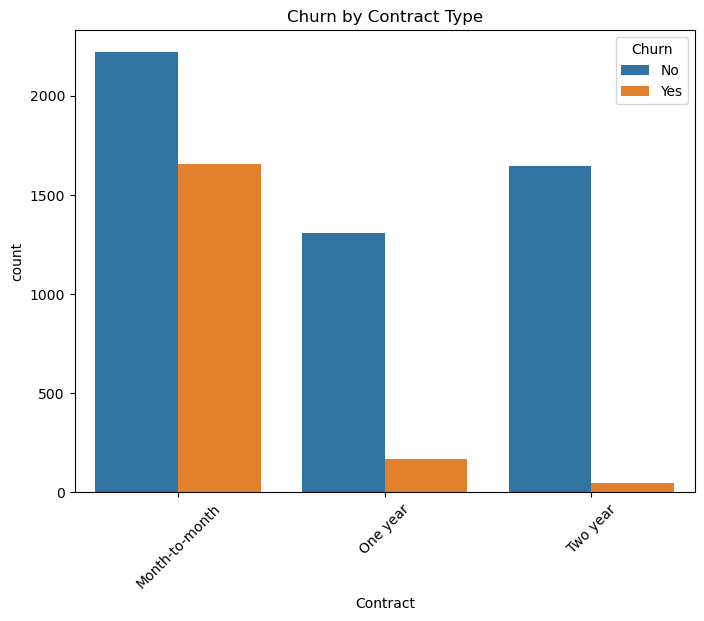

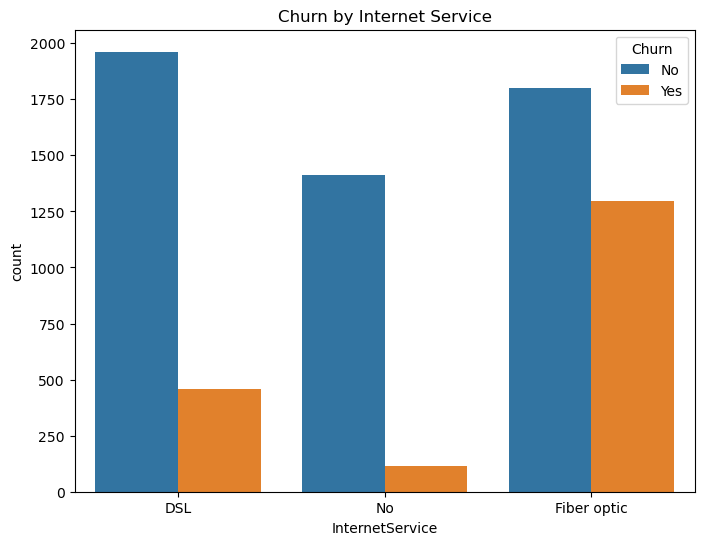

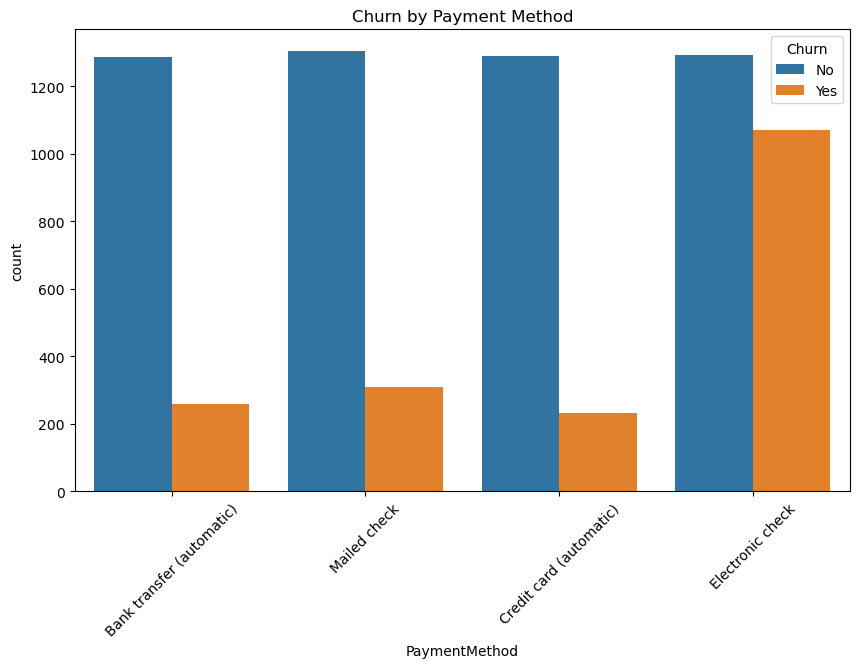

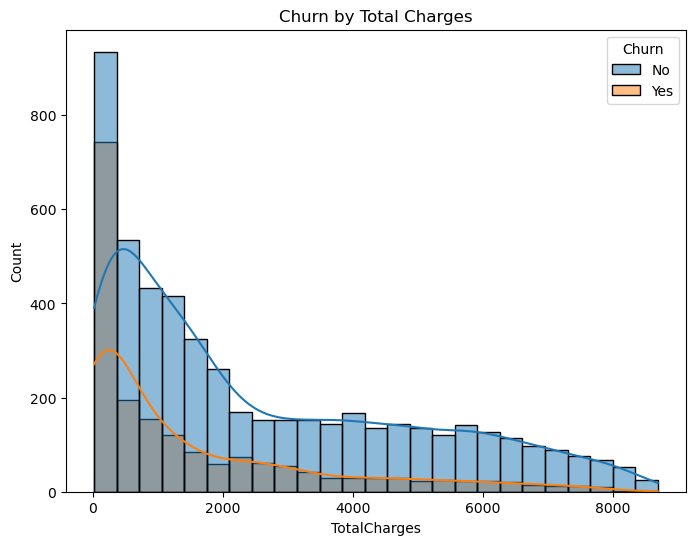

In [13]:
#Plots of churn and other features
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='tenure', data=df_Churn)
plt.title('Churn by Tenure')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_Churn)
plt.title('Churn by Monthly Charges')

plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=df_Churn)
plt.title('Churn by Contract Type')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data=df_Churn)
plt.title('Churn by Internet Service')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df_Churn)
plt.title('Churn by Payment Method')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df_Churn, x='TotalCharges', hue='Churn', kde=True)
plt.title('Churn by Total Charges')
plt.show()

### 2. Preprocessing

##### Removing bias by deleting Gender variable

In [14]:
#Dropping the Gender variable to remove gender bias from the system to make predictions
#Dropping the customerID variable which doesnt play role in any predictions
df_Churn_clean = df_Churn.drop(columns=["customerID","gender"])
df_Churn_clean.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,No,No,41,Yes,Yes,DSL,Yes,No,Yes,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),74.65,3090.65,No
1,0,Yes,Yes,17,Yes,Yes,DSL,No,Yes,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,66.70,1077.05,No
2,0,Yes,Yes,58,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),24.50,1497.90,No
3,0,No,No,1,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,50.45,50.45,Yes
4,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes


##### Outlier Detection for the numerical features of the data and imputation of missing values

In [15]:

#Imputing the null values of the numerical column with the mean of the column


import numpy as np

# numerical_features - Continous - ('MonthlyCharges', 'TotalCharges') of the dataset

numerical_features = ['MonthlyCharges', 'TotalCharges']
threshold = 3 

outliers = {}

# Loop through each numerical feature
for column in numerical_features:  # Iterate through numerical features only
    if column in df_Churn_clean.columns:
        # Check if the feature has numeric data
        if np.issubdtype(df_Churn_clean[column].dtype, np.number):
            # Convert the values of the numerical feature to float
            df_Churn_clean[column] = pd.to_numeric(df_Churn_clean[column], errors='coerce')

            # Impute missing values with the mean of the column
            df_Churn_clean[column].fillna(df_Churn_clean[column].mean(), inplace=True)

            # Calculate Z-scores for the current feature
            z_scores = np.abs((df_Churn_clean[column] - df_Churn_clean[column].mean()) / df_Churn_clean[column].std())

            # Count outliers based on the threshold
            count_outliers = np.sum(z_scores > threshold)

            # Calculate the percentage of outliers
            percentage = count_outliers / len(df_Churn_clean)

            outliers[column] = "%.3f" % percentage

print("Percentage of outliers for each numerical feature:")
print(outliers)


Percentage of outliers for each numerical feature:
{'MonthlyCharges': '0.000', 'TotalCharges': '0.000'}


#### As their is a class imbalance we need to balance the two classes of Churn (predicted) yes and no equally

In [16]:
#As their is a class imbalance we need to balance the two classes yes and no equally
#Using oversampling method 
data_yes = df_Churn_clean[df_Churn_clean["Churn"] == "Yes"]
data_no = df_Churn_clean[df_Churn_clean["Churn"] == "No"]

over_sampling = data_yes.sample(No, replace=True, random_state=0)

data_resampled = pd.concat([data_no, over_sampling], axis=0)

In [17]:
#Drop the old index making sure a clean and continuous index starting from 0.
data_resampled = data_resampled.reset_index(drop=True)

In [18]:
#Ensuring both the classes are equally present in the dataset 
target_2 = data_resampled["Churn"]
yes_2 = target_2[target_2 == "Yes"].count()
no_2 = target_2[target_2 == "No"].count()

print("yes %: " + str(yes_2/len(target_2)*100) + " - no %: " + str(no_2/len(target_2)*100))

yes %: 50.0 - no %: 50.0


In [19]:
print("Before Oversampling",df_Churn_clean.shape)
print("% of Yes in Churn: " + str(Yes/len(target)*100) + " % of No in Churn: " + str(No/len(target)*100))
print("After Oversampling",data_resampled.shape)
print("% of Yes in Churn: " + str(yes_2/len(target_2)*100) + " % of No in Churn: " + str(no_2/len(target_2)*100))

Before Oversampling (7043, 19)
% of Yes in Churn: 26.536987079369588 % of No in Churn: 73.4630129206304
After Oversampling (10348, 19)
% of Yes in Churn: 50.0 % of No in Churn: 50.0


In [20]:
def basic_info (data,target):
    dic= {'Target':[target],'shape':[data.shape],
          'target type':[data[target].dtype],
          'N.catigorical feature':[(data.dtypes=='object').sum()],
          'N.numerical feature':[((data.dtypes == 'float64') | (data.dtypes == 'int64')).sum()],
          'Task':['classification' if data[target].dtype == 'object' else 'regression']
         }
    df = pd.DataFrame(dic)
    
    return df.T
    
basic_info(data_resampled,'Churn')

,0
Target,Churn
shape,"(10348, 19)"
target type,object
N.catigorical feature,15
N.numerical feature,4
Task,classification


In [21]:
data_resampled.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,No,No,41,Yes,Yes,DSL,Yes,No,Yes,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),74.65,3090.65,No
1,0,Yes,Yes,17,Yes,Yes,DSL,No,Yes,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,66.70,1077.05,No
2,0,Yes,Yes,58,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),24.50,1497.90,No
3,0,No,No,60,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),104.95,6236.75,No
4,0,Yes,Yes,72,No,No phone service,DSL,No,Yes,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),53.65,3784.00,No


### Data preprocessing for managing input to the neural nets

In [22]:
## Finding the numerical (Continous or Discrete data)
def num(data):
    num_feature=[i for  i in data.columns  if data[i].dtype !='object']
    return num_feature
num_feature=num(data_resampled)
num_feature

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [23]:
## Finding the Categorical data
def cat(data):
    cat_feature=[i for  i in data.columns  if data[i].dtype =='object']
    return cat_feature
cat_feature = cat(data_resampled)
cat_feature

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [24]:
##Finding all unique values of each of the feature of the data points
def uniq (df):
    df=pd.DataFrame([[i,df[i].unique(),df[i].dtype,len(df[i].unique())]for i in df.columns],columns=['feature','val','types','len']).set_index('feature')
    return df
df_unique= uniq(data_resampled)
df_unique

,val,types,len
feature,,,
SeniorCitizen,"[0, 1]",int64,2
Partner,"[No, Yes]",object,2
Dependents,"[No, Yes]",object,2
tenure,"[41, 17, 58, 60, 72, 36, 7, 21, 51, 50, 54, 37...",int64,73
PhoneService,"[Yes, No]",object,2
MultipleLines,"[Yes, No, No phone service]",object,3
InternetService,"[DSL, No, Fiber optic]",object,3
OnlineSecurity,"[Yes, No, No internet service]",object,3
OnlineBackup,"[No, Yes, No internet service]",object,3


In [25]:
## Finding the feature which have greater than 2 unique values for the categorical data
cat_val = list(df_unique[(df_unique['len']>2) & (df_unique['types']=='object')].index)
cat_val

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [26]:
## Finding the feature which have excatly 2 unique values for the categorical data
bin_val =list(df_unique[df_unique['len']==2].index)

bin_val

['SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [27]:
## For converting binary categorical variables values to 0 and 1
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

for col in bin_val :
    data_resampled[col]=lb.fit_transform(data_resampled[col])
    

In [28]:
#Normalise the numerical columns
from sklearn.preprocessing import MinMaxScaler

# X contains the features we want to scale  tenure, MonthlyCharges, and TotalCharges
# Replace this with your actual feature data
features_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
X = data_resampled[features_to_scale]

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the features using Min-Max scaling
X_scaled = scaler.fit_transform(X)

# Replace the original features with the scaled features in the DataFrame
data_resampled[features_to_scale] = X_scaled

# Print the first few rows of the DataFrame to verify the scaling
print(data_resampled.head())


   SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0              0        0           0  0.569444             1   
1              0        1           1  0.236111             1   
2              0        1           1  0.805556             1   
3              0        0           0  0.833333             1   
4              0        1           1  1.000000             0   

      MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
0               Yes             DSL                  Yes                   No   
1               Yes             DSL                   No                  Yes   
2               Yes              No  No internet service  No internet service   
3                No     Fiber optic                  Yes                   No   
4  No phone service             DSL                   No                  Yes   

      DeviceProtection          TechSupport          StreamingTV  \
0                  Yes                  Yes           

In [29]:
def dummy(data):
    df_dummy=pd.get_dummies(data)
    return df_dummy
df_dummy = dummy(data_resampled)
df_dummy

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0.569444,1,1,0.561194,0.354471,0,0,...,0,0,1,1,0,0,1,0,0,0
1,0,1,1,0.236111,1,1,0.482090,0.122115,0,0,...,1,0,0,1,0,0,0,0,0,1
2,0,1,1,0.805556,1,1,0.062189,0.170679,0,0,...,0,1,0,0,1,0,0,1,0,0
3,0,0,0,0.833333,1,1,0.862687,0.717511,0,1,...,0,0,1,1,0,0,1,0,0,0
4,0,1,1,1.000000,0,0,0.352239,0.434480,0,0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,0,0,0,0.055556,1,0,0.322886,0.015290,1,1,...,1,0,0,1,0,0,0,1,0,0
10344,0,1,1,0.180556,1,0,0.375124,0.082570,1,1,...,0,0,1,1,0,0,0,0,1,0
10345,1,0,0,0.222222,1,1,0.777612,0.180291,1,0,...,0,0,1,1,0,0,0,0,1,0
10346,0,1,0,0.083333,1,1,0.723881,0.059105,1,1,...,0,0,1,1,0,0,0,0,1,0


In [30]:
df_dummy.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0.569444,1,1,0.561194,0.354471,0,0,...,0,0,1,1,0,0,1,0,0,0
1,0,1,1,0.236111,1,1,0.482090,0.122115,0,0,...,1,0,0,1,0,0,0,0,0,1
2,0,1,1,0.805556,1,1,0.062189,0.170679,0,0,...,0,1,0,0,1,0,0,1,0,0
3,0,0,0,0.833333,1,1,0.862687,0.717511,0,1,...,0,0,1,1,0,0,1,0,0,0
4,0,1,1,1.000000,0,0,0.352239,0.434480,0,0,...,0,0,1,0,0,1,0,1,0,0


In [31]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            10348 non-null  int32  
 1   Partner                                  10348 non-null  int32  
 2   Dependents                               10348 non-null  int32  
 3   tenure                                   10348 non-null  float64
 4   PhoneService                             10348 non-null  int32  
 5   PaperlessBilling                         10348 non-null  int32  
 6   MonthlyCharges                           10348 non-null  float64
 7   TotalCharges                             10348 non-null  float64
 8   Churn                                    10348 non-null  int32  
 9   MultipleLines_No                         10348 non-null  uint8  
 10  MultipleLines_No phone service           10348

In [32]:
df_dummy.to_csv("ChurnPredFinal_prepared.csv",index=False)

In [33]:
# Extract the column which we are predicting
target_column = df_dummy.pop('Churn')

# Reinsert the column at the last position
df_dummy['Churn'] = target_column

# Display the DataFrame to verify the change
print(df_dummy)


       SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0                  0        0           0  0.569444             1   
1                  0        1           1  0.236111             1   
2                  0        1           1  0.805556             1   
3                  0        0           0  0.833333             1   
4                  0        1           1  1.000000             0   
...              ...      ...         ...       ...           ...   
10343              0        0           0  0.055556             1   
10344              0        1           1  0.180556             1   
10345              1        0           0  0.222222             1   
10346              0        1           0  0.083333             1   
10347              0        1           1  0.652778             1   

       PaperlessBilling  MonthlyCharges  TotalCharges  MultipleLines_No  \
0                     1        0.561194      0.354471                 0   
1                    

In [34]:
# Assuming 'Old_Column_Name' is the old column name and 'New_Column_Name' is the new column name
df_dummy.rename(columns={'df_dummy': 'Churn'}, inplace=True)

# Display the DataFrame to verify the change
df_dummy

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,0,0,0.569444,1,1,0.561194,0.354471,0,0,...,0,1,1,0,0,1,0,0,0,0
1,0,1,1,0.236111,1,1,0.482090,0.122115,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,1,0.805556,1,1,0.062189,0.170679,0,0,...,1,0,0,1,0,0,1,0,0,0
3,0,0,0,0.833333,1,1,0.862687,0.717511,1,0,...,0,1,1,0,0,1,0,0,0,0
4,0,1,1,1.000000,0,0,0.352239,0.434480,0,1,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,0,0,0,0.055556,1,0,0.322886,0.015290,1,0,...,0,0,1,0,0,0,1,0,0,1
10344,0,1,1,0.180556,1,0,0.375124,0.082570,1,0,...,0,1,1,0,0,0,0,1,0,1
10345,1,0,0,0.222222,1,1,0.777612,0.180291,0,0,...,0,1,1,0,0,0,0,1,0,1
10346,0,1,0,0.083333,1,1,0.723881,0.059105,1,0,...,0,1,1,0,0,0,0,1,0,1


In [35]:
df_dummy.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,0,0,0.569444,1,1,0.561194,0.354471,0,0,...,0,1,1,0,0,1,0,0,0,0
1,0,1,1,0.236111,1,1,0.482090,0.122115,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,1,0.805556,1,1,0.062189,0.170679,0,0,...,1,0,0,1,0,0,1,0,0,0
3,0,0,0,0.833333,1,1,0.862687,0.717511,1,0,...,0,1,1,0,0,1,0,0,0,0
4,0,1,1,1.000000,0,0,0.352239,0.434480,0,1,...,0,1,0,0,1,0,1,0,0,0


In [36]:
#Separating Predictor(X) and Predicted(Y)
X = df_dummy.iloc[:,:-1]
y = df_dummy["Churn"]

array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'Partner'}>,
        <AxesSubplot:title={'center':'Dependents'}>,
        <AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'PhoneService'}>,
        <AxesSubplot:title={'center':'PaperlessBilling'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'TotalCharges'}>,
        <AxesSubplot:title={'center':'MultipleLines_No'}>,
        <AxesSubplot:title={'center':'MultipleLines_No phone service'}>,
        <AxesSubplot:title={'center':'MultipleLines_Yes'}>,
        <AxesSubplot:title={'center':'InternetService_DSL'}>],
       [<AxesSubplot:title={'center':'InternetService_Fiber optic'}>,
        <AxesSubplot:title={'center':'InternetService_No'}>,
        <AxesSubplot:title={'center':'OnlineSecurity_No'}>,
        <AxesSubplot:title={'center':'OnlineSecurity_No internet service'}>,
        <AxesSubplot:title={'center':'Onli

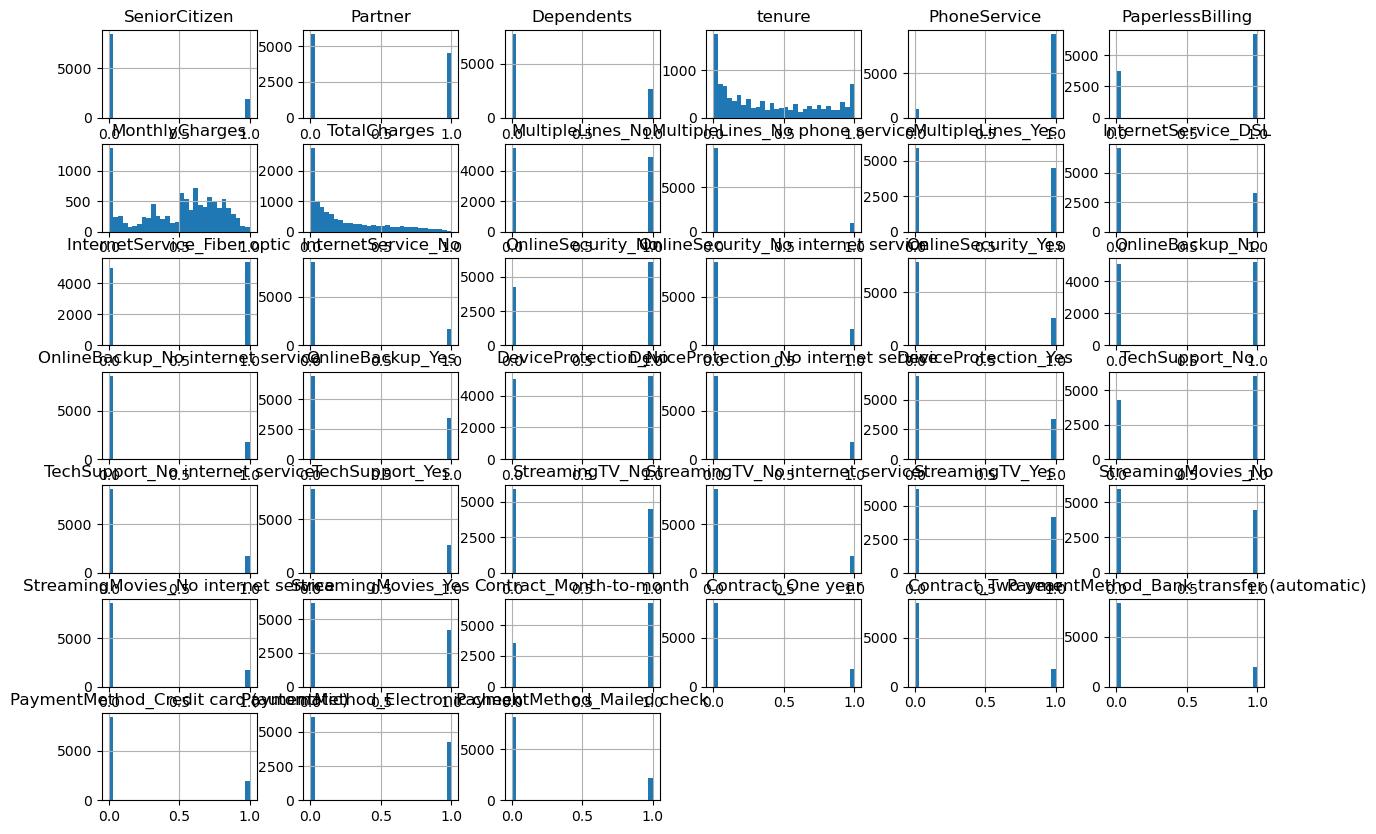

In [37]:
############# Histogram ##############
X.hist(bins=30, figsize=(15, 10))

In [38]:
#Partioning the dataset
X_new, X_test, y_new, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
dev_per = X_test.shape[0]/X_new.shape[0]
X_train, X_dev, y_train, y_dev = train_test_split(X_new, y_new, test_size=dev_per, random_state=0)
print("Training sets:",X_train.shape, y_train.shape)
print("Validation sets:",X_dev.shape, y_dev.shape)
print("Testing sets:",X_test.shape, y_test.shape)

Training sets: (6208, 39) (6208,)
Validation sets: (2070, 39) (2070,)
Testing sets: (2070, 39) (2070,)


In [39]:
##Converting the dataset using torch.tensor as neural nets only understand matrix format of the data and coerce the same using float(X) or long(Y)
X_dev_torch = torch.tensor(X_train.values).float()
y_dev_torch = torch.tensor(y_train.values).long()
X_test_torch = torch.tensor(X_test.values).float()
y_test_torch = torch.tensor(y_test.values).long()

### 3. Model architecture 

### 4.Training and evaluation

##### Experiment 1 - Hyperparameters and  Architecture of the neural network	 
    
* Hidden Layer Sizes	[100, 100, 50, 50]	 
* Dropout Rate	0.1
* Loss Function	Negative Log Likelihood Loss (NLLLoss)	 
* Optimizer	Adam with learning rate 0.001	 
* Epochs	1000	 
* Batch Size	128	 
* Model Architecture	Layers	Activation

Input	

* Hidden Layer 1	Linear (100 units)	ReLU
* Hidden Layer 2	Linear (100 units)	ReLU
* Hidden Layer 3	Linear (50 units)	ReLU
* Hidden Layer 4	Linear (50 units)	ReLU
* Output	Linear (2 units)	Log-Softmax


In [40]:
#Model definition 
class Classifier(nn.Module):
    #Initialising the model which hidden layers and no of neurons in each of the layer
    def __init__(self, input_size):
        super().__init__()
        self.hidden_1 = nn.Linear(input_size, 100)
        self.hidden_2 = nn.Linear(100, 100)
        self.hidden_3 = nn.Linear(100, 50)
        self.hidden_4 = nn.Linear(50,50)
        self.output = nn.Linear(50, 2)
    #Dropout rate for the neurons
        self.dropout = nn.Dropout(p=0.1)
    #Activation function for each layer
    def forward(self, x):
        z = self.dropout(F.relu(self.hidden_1(x)))
        z = self.dropout(F.relu(self.hidden_2(z)))
        z = self.dropout(F.relu(self.hidden_3(z)))
        z = self.dropout(F.relu(self.hidden_4(z)))
        #For the output layer and back propagation we have defined here
        out = F.log_softmax(self.output(z), dim=1)

        return out

In [41]:
#Calling the model defined over here by passing the training dataset
model = Classifier(X_train.shape[1])

#Loss function for the Neural net defined above
criterion = nn.NLLLoss()

#Adam Optimizer with learning rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=0.001)

#Learning(Train) over 1000 epoch each 128 batches
epochs = 1000
batch_size = 128

In [42]:
#This is done for each epoch
#Calculation of loss over train and test
train_losses, dev_losses, train_acc, dev_acc= [], [], [], []
x_axis = []

#Shuffling the input for each epoch so that model doesnt get overtrained
for e in range(1, epochs + 1):
    X_, y_ = shuffle(X_train, y_train)
    running_loss = 0
    running_acc = 0
    iterations = 0
#Mini batches which will be running for the entire batch size
    for i in range(0, len(X_), batch_size):
        iterations += 1
        b = i + batch_size
        #Converting values in the understandable format for the above defined neural net
        X_batch = torch.tensor(X_.iloc[i:b,:].values).float()
        y_batch = torch.tensor(y_.iloc[i:b].values, dtype=torch.long)
        
        #Optimising and back propagate the losses for improving the learning of the neural net over each epoch
        log_ps = model(X_batch)
        loss = criterion(log_ps, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        ##Calculating accuracy, loss for the entire epoch for the batch
        running_loss += loss.item()
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        running_acc += accuracy_score(y_batch, top_class)

    dev_loss = 0
    acc = 0

    # Turn off gradients for validation, saves memory and computations
    with torch.no_grad():
        model.eval()
        log_dev = model(X_dev_torch)
        dev_loss = criterion(log_dev, y_dev_torch)

        ps_dev = torch.exp(log_dev)
        top_p, top_class_dev = ps_dev.topk(1, dim=1)
        acc = accuracy_score(y_dev_torch, top_class_dev)

    model.train()

    #Print output only when the Epoch no is divisible by 50 or is equal to 1
    if e%50 == 0 or e == 1:
        x_axis.append(e)

        train_losses.append(running_loss/iterations)
        dev_losses.append(dev_loss)
        train_acc.append(running_acc/iterations)
        dev_acc.append(acc)

        print("Epoch: {}/{}.. ".format(e, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/iterations),
              "Validation Loss: {:.3f}.. ".format(dev_loss),
              "Training Accuracy: {:.3f}.. ".format(running_acc/iterations),
              "Validation Accuracy: {:.3f}".format(acc))

Epoch: 1/1000..  Training Loss: 0.597..  Validation Loss: 0.506..  Training Accuracy: 0.685..  Validation Accuracy: 0.761
Epoch: 50/1000..  Training Loss: 0.307..  Validation Loss: 0.258..  Training Accuracy: 0.864..  Validation Accuracy: 0.889
Epoch: 100/1000..  Training Loss: 0.226..  Validation Loss: 0.169..  Training Accuracy: 0.900..  Validation Accuracy: 0.929
Epoch: 150/1000..  Training Loss: 0.212..  Validation Loss: 0.148..  Training Accuracy: 0.910..  Validation Accuracy: 0.938
Epoch: 200/1000..  Training Loss: 0.189..  Validation Loss: 0.143..  Training Accuracy: 0.917..  Validation Accuracy: 0.938
Epoch: 250/1000..  Training Loss: 0.178..  Validation Loss: 0.128..  Training Accuracy: 0.923..  Validation Accuracy: 0.942
Epoch: 300/1000..  Training Loss: 0.176..  Validation Loss: 0.132..  Training Accuracy: 0.922..  Validation Accuracy: 0.945
Epoch: 350/1000..  Training Loss: 0.169..  Validation Loss: 0.121..  Training Accuracy: 0.924..  Validation Accuracy: 0.948
Epoch: 400/

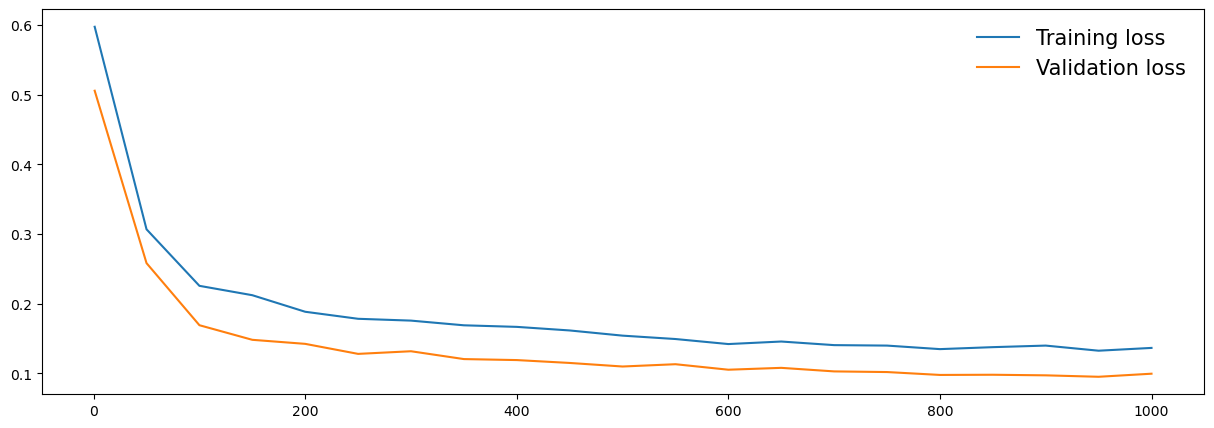

In [43]:
## Plotting the Training Loss and Validation loss for each epoch
fig = plt.figure(figsize=(15, 5))
plt.plot(x_axis,train_losses, label='Training loss')
plt.plot(x_axis, dev_losses, label='Validation loss')
plt.legend(frameon=False, fontsize=15)
plt.show()

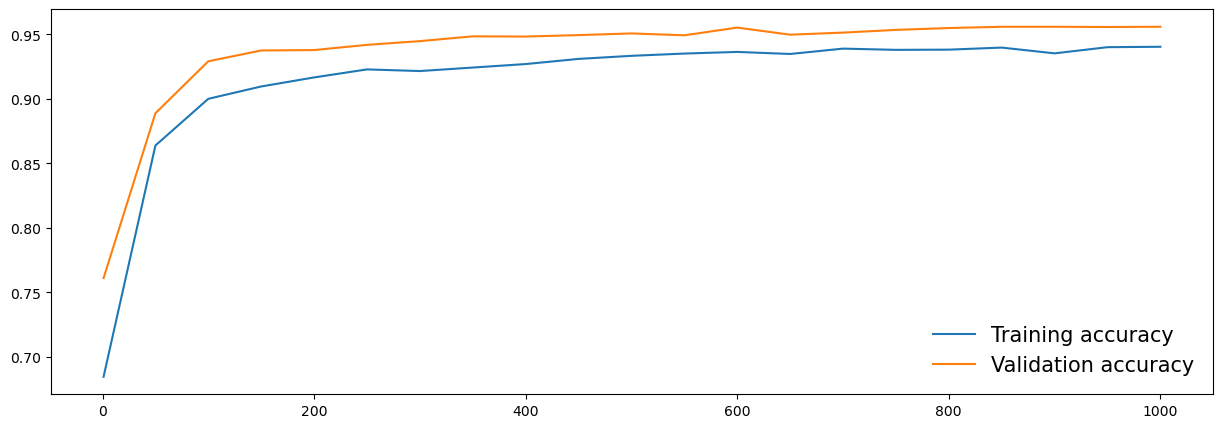

In [44]:
## Plotting the Training accuracy and Validation accuracy for each epoch
fig = plt.figure(figsize=(15, 5))
plt.plot(x_axis, train_acc, label="Training accuracy")
plt.plot(x_axis, dev_acc, label="Validation accuracy")
plt.legend(frameon=False, fontsize=15)
plt.show()

In [48]:
#Printing the Statistical Metrics for the model's performance

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model.eval()
test_pred = model(X_test_torch)
test_pred = torch.exp(test_pred)
top_p, top_class_test = test_pred.topk(1, dim=1)

y_test_numpy = y_test_torch.cpu().numpy().flatten()
top_class_test_numpy = top_class_test.cpu().numpy().flatten()


# Calculate accuracy
accuracy = accuracy_score(y_test_numpy, top_class_test_numpy)

# Calculate precision
precision = precision_score(y_test_numpy, top_class_test_numpy)

# Calculate recall
recall = recall_score(y_test_numpy, top_class_test_numpy)

# Calculate F1 score
f1 = f1_score(y_test_numpy, top_class_test_numpy)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8342995169082126
Precision: 0.8111702127659575
Recall: 0.8755980861244019
F1 Score: 0.8421537045559134


In [46]:
checkpoint = {"input": X_train.shape[1],
              "state_dict": model.state_dict()}

In [47]:
torch.save(checkpoint, "checkpoint.pth")

### 5. Experimentation with different hyperparameters and architectures

##### Experiment 2 - Hyperparameters and  Architecture of the neural network	 
    
* Hidden Layer Sizes	[100, 50, 50]	 
* Dropout Rate	0.2
* Loss Function	Negative Log Likelihood Loss (NLLLoss)	 
* Optimizer	Adam with learning rate 0.01	 
* Epochs	500	 
* Batch Size	128	 
* Model Architecture	Layers	Activation

Input	

* Hidden Layer 1	Linear (100 units)	ReLU
* Hidden Layer 2	Linear (50 units)	ReLU
* Hidden Layer 3	Linear (50 units)	ReLU
* Output	Linear (2 units)	Log-Softmax


In [ ]:
#Model definition 
class Classifier(nn.Module):
    #Initialising the model which hidden layers and no of neurons in each of the layer
    def __init__(self, input_size):
        super().__init__()
        self.hidden_1 = nn.Linear(input_size, 100)
        self.hidden_2 = nn.Linear(100, 50)
        self.hidden_3 = nn.Linear(50,50)
        self.output = nn.Linear(50, 2)
    #Dropout rate for the neurons
        self.dropout = nn.Dropout(p=0.2)
    #Activation function for each layer
    def forward(self, x):
        z = self.dropout(F.relu(self.hidden_1(x)))
        z = self.dropout(F.relu(self.hidden_2(z)))
        z = self.dropout(F.relu(self.hidden_3(z)))
        #For the output layer and back propagation we have defined here
        out = F.log_softmax(self.output(z), dim=1)

        return out

In [57]:
#Calling the model defined over here by passing the training dataset
model = Classifier(X_train.shape[1])

#Loss function for the Neural net defined above
criterion = nn.NLLLoss()

#Adam Optimizer with learning rate = 0.01
optimizer = optim.Adam(model.parameters(), lr=0.01)

#Learning(Train) over 500 epoch each 128 batches
epochs = 500
batch_size = 128

In [58]:
#This is done for each epoch
#Calculation of loss over train and test
train_losses, dev_losses, train_acc, dev_acc= [], [], [], []
x_axis = []

#Shuffling the input for each epoch so that model doesnt get overtrained
for e in range(1, epochs + 1):
    X_, y_ = shuffle(X_train, y_train)
    running_loss = 0
    running_acc = 0
    iterations = 0
#Mini batches which will be running for the entire batch size
    for i in range(0, len(X_), batch_size):
        iterations += 1
        b = i + batch_size
        #Converting values in the understandable format for the above defined neural net
        X_batch = torch.tensor(X_.iloc[i:b,:].values).float()
        y_batch = torch.tensor(y_.iloc[i:b].values, dtype=torch.long)
        
        #Optimising and back propagate the losses for improving the learning of the neural net over each epoch
        log_ps = model(X_batch)
        loss = criterion(log_ps, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        ##Calculating accuracy, loss for the entire epoch for the batch
        running_loss += loss.item()
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        running_acc += accuracy_score(y_batch, top_class)

    dev_loss = 0
    acc = 0

    # Turn off gradients for validation, saves memory and computations
    with torch.no_grad():
        model.eval()
        log_dev = model(X_dev_torch)
        dev_loss = criterion(log_dev, y_dev_torch)

        ps_dev = torch.exp(log_dev)
        top_p, top_class_dev = ps_dev.topk(1, dim=1)
        acc = accuracy_score(y_dev_torch, top_class_dev)

    model.train()

    #Print output only when the Epoch no is divisible by 50 or is equal to 1
    if e%50 == 0 or e == 1:
        x_axis.append(e)

        train_losses.append(running_loss/iterations)
        dev_losses.append(dev_loss)
        train_acc.append(running_acc/iterations)
        dev_acc.append(acc)

        print("Epoch: {}/{}.. ".format(e, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/iterations),
              "Validation Loss: {:.3f}.. ".format(dev_loss),
              "Training Accuracy: {:.3f}.. ".format(running_acc/iterations),
              "Validation Accuracy: {:.3f}".format(acc))

Epoch: 1/500..  Training Loss: 0.532..  Validation Loss: 0.480..  Training Accuracy: 0.744..  Validation Accuracy: 0.775
Epoch: 50/500..  Training Loss: 0.400..  Validation Loss: 0.385..  Training Accuracy: 0.809..  Validation Accuracy: 0.825
Epoch: 100/500..  Training Loss: 0.364..  Validation Loss: 0.349..  Training Accuracy: 0.829..  Validation Accuracy: 0.852
Epoch: 150/500..  Training Loss: 0.345..  Validation Loss: 0.344..  Training Accuracy: 0.840..  Validation Accuracy: 0.856
Epoch: 200/500..  Training Loss: 0.333..  Validation Loss: 0.341..  Training Accuracy: 0.847..  Validation Accuracy: 0.864
Epoch: 250/500..  Training Loss: 0.335..  Validation Loss: 0.340..  Training Accuracy: 0.844..  Validation Accuracy: 0.857
Epoch: 300/500..  Training Loss: 0.339..  Validation Loss: 0.353..  Training Accuracy: 0.841..  Validation Accuracy: 0.862
Epoch: 350/500..  Training Loss: 0.329..  Validation Loss: 0.331..  Training Accuracy: 0.851..  Validation Accuracy: 0.872
Epoch: 400/500..  T

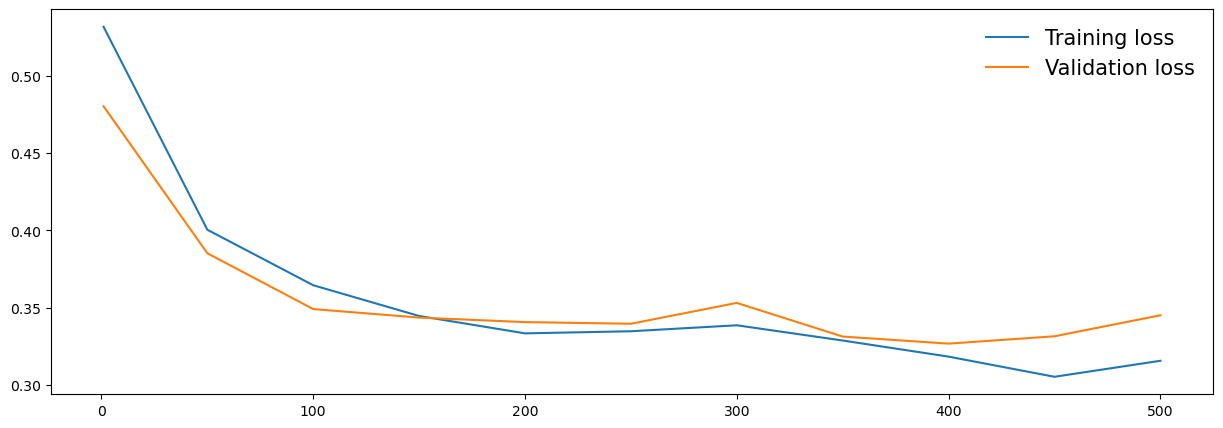

In [59]:
## Plotting the Training Loss and Validation loss for each epoch
fig = plt.figure(figsize=(15, 5))
plt.plot(x_axis,train_losses, label='Training loss')
plt.plot(x_axis, dev_losses, label='Validation loss')
plt.legend(frameon=False, fontsize=15)
plt.show()

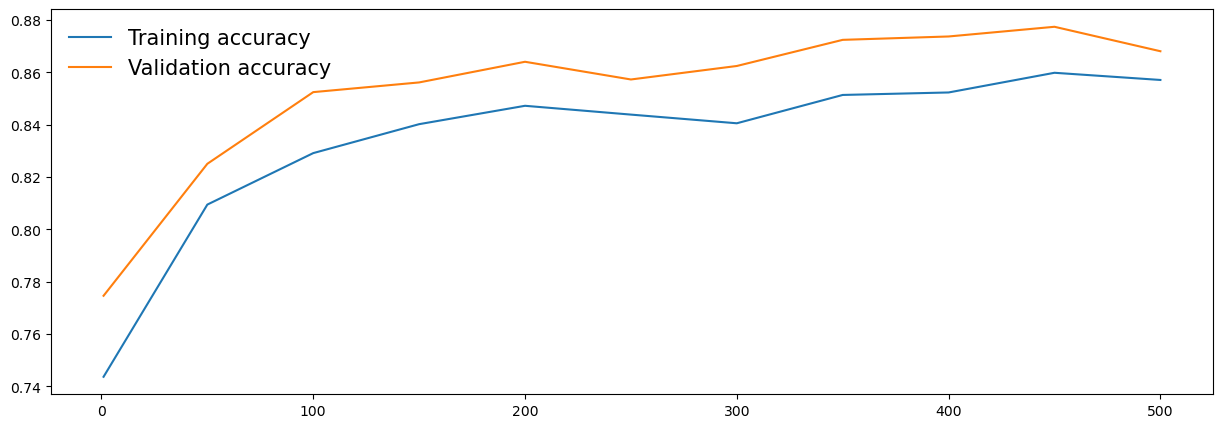

In [60]:
## Plotting the Training accuracy and Validation accuracy for each epoch
fig = plt.figure(figsize=(15, 5))
plt.plot(x_axis, train_acc, label="Training accuracy")
plt.plot(x_axis, dev_acc, label="Validation accuracy")
plt.legend(frameon=False, fontsize=15)
plt.show()

In [61]:
#Printing the Statistical Metrics for the model's performance

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model.eval()
test_pred = model(X_test_torch)
test_pred = torch.exp(test_pred)
top_p, top_class_test = test_pred.topk(1, dim=1)

y_test_numpy = y_test_torch.cpu().numpy().flatten()
top_class_test_numpy = top_class_test.cpu().numpy().flatten()


# Calculate accuracy
accuracy = accuracy_score(y_test_numpy, top_class_test_numpy)

# Calculate precision
precision = precision_score(y_test_numpy, top_class_test_numpy)

# Calculate recall
recall = recall_score(y_test_numpy, top_class_test_numpy)

# Calculate F1 score
f1 = f1_score(y_test_numpy, top_class_test_numpy)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8724637681159421
Precision: 0.8256880733944955
Recall: 0.9473684210526315
F1 Score: 0.8823529411764707


##### Experiment 3 - Hyperparameters and  Architecture of the neural network	 
    
* Hidden Layer Sizes	[50, 50, 50]	 
* Dropout Rate	0.3
* Loss Function	Negative Log Likelihood Loss (NLLLoss)	 
* Optimizer	Adam with learning rate 0.1	 
* Epochs	500	 
* Batch Size	128	 

Model Architecture	Layers	Activation

Input	

* Hidden Layer 1	Linear (50 units)	ReLU
* Hidden Layer 2	Linear (50 units)	ReLU
* Hidden Layer 3	Linear (50 units)	ReLU
* Output	Linear (2 units)	Log-Softmax


In [62]:
#Model definition 
class Classifier(nn.Module):
    #Initialising the model which hidden layers and no of neurons in each of the layer
    def __init__(self, input_size):
        super().__init__()
        self.hidden_1 = nn.Linear(input_size, 50)
        self.hidden_2 = nn.Linear(50, 50)
        self.hidden_3 = nn.Linear(50,50)
        self.output = nn.Linear(50, 2)
    #Dropout rate for the neurons
        self.dropout = nn.Dropout(p=0.3)
    #Activation function for each layer
    def forward(self, x):
        z = self.dropout(F.relu(self.hidden_1(x)))
        z = self.dropout(F.relu(self.hidden_2(z)))
        z = self.dropout(F.relu(self.hidden_3(z)))
        #For the output layer and back propagation we have defined here
        out = F.log_softmax(self.output(z), dim=1)

        return out

In [63]:
#Calling the model defined over here by passing the training dataset
model = Classifier(X_train.shape[1])

#Loss function for the Neural net defined above
criterion = nn.NLLLoss()

#Adam Optimizer with learning rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=0.01)

#Learning(Train) over 1000 epoch each 128 batches
epochs = 500
batch_size = 128

In [65]:
#This is done for each epoch
#Calculation of loss over train and test
train_losses, dev_losses, train_acc, dev_acc= [], [], [], []
x_axis = []

#Shuffling the input for each epoch so that model doesnt get overtrained
for e in range(1, epochs + 1):
    X_, y_ = shuffle(X_train, y_train)
    running_loss = 0
    running_acc = 0
    iterations = 0
#Mini batches which will be running for the entire batch size
    for i in range(0, len(X_), batch_size):
        iterations += 1
        b = i + batch_size
        #Converting values in the understandable format for the above defined neural net
        X_batch = torch.tensor(X_.iloc[i:b,:].values).float()
        y_batch = torch.tensor(y_.iloc[i:b].values, dtype=torch.long)
        
        #Optimising and back propagate the losses for improving the learning of the neural net over each epoch
        log_ps = model(X_batch)
        loss = criterion(log_ps, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        ##Calculating accuracy, loss for the entire epoch for the batch
        running_loss += loss.item()
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        running_acc += accuracy_score(y_batch, top_class)

    dev_loss = 0
    acc = 0

    # Turn off gradients for validation, saves memory and computations
    with torch.no_grad():
        model.eval()
        log_dev = model(X_dev_torch)
        dev_loss = criterion(log_dev, y_dev_torch)

        ps_dev = torch.exp(log_dev)
        top_p, top_class_dev = ps_dev.topk(1, dim=1)
        acc = accuracy_score(y_dev_torch, top_class_dev)

    model.train()

    #Print output only when the Epoch no is divisible by 50 or is equal to 1
    if e%50 == 0 or e == 1:
        x_axis.append(e)

        train_losses.append(running_loss/iterations)
        dev_losses.append(dev_loss)
        train_acc.append(running_acc/iterations)
        dev_acc.append(acc)

        print("Epoch: {}/{}.. ".format(e, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/iterations),
              "Validation Loss: {:.3f}.. ".format(dev_loss),
              "Training Accuracy: {:.3f}.. ".format(running_acc/iterations),
              "Validation Accuracy: {:.3f}".format(acc))

Epoch: 1/500..  Training Loss: 0.542..  Validation Loss: 0.484..  Training Accuracy: 0.732..  Validation Accuracy: 0.770
Epoch: 50/500..  Training Loss: 0.448..  Validation Loss: 0.418..  Training Accuracy: 0.785..  Validation Accuracy: 0.804
Epoch: 100/500..  Training Loss: 0.431..  Validation Loss: 0.399..  Training Accuracy: 0.791..  Validation Accuracy: 0.820
Epoch: 150/500..  Training Loss: 0.432..  Validation Loss: 0.409..  Training Accuracy: 0.789..  Validation Accuracy: 0.813
Epoch: 200/500..  Training Loss: 0.422..  Validation Loss: 0.409..  Training Accuracy: 0.793..  Validation Accuracy: 0.814
Epoch: 250/500..  Training Loss: 0.414..  Validation Loss: 0.402..  Training Accuracy: 0.794..  Validation Accuracy: 0.825
Epoch: 300/500..  Training Loss: 0.410..  Validation Loss: 0.393..  Training Accuracy: 0.799..  Validation Accuracy: 0.831
Epoch: 350/500..  Training Loss: 0.412..  Validation Loss: 0.403..  Training Accuracy: 0.799..  Validation Accuracy: 0.824
Epoch: 400/500..  T

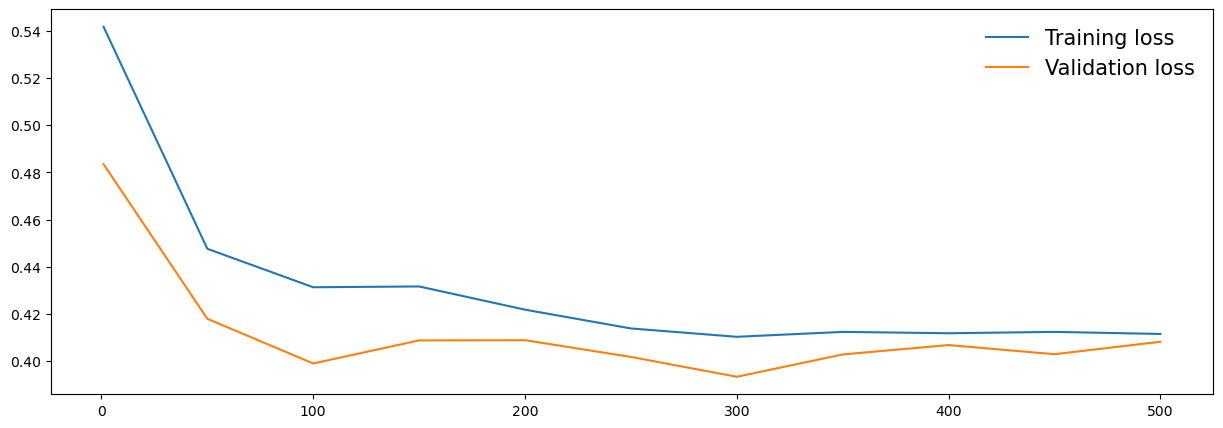

In [66]:
## Plotting the Training Loss and Validation loss for each epoch
fig = plt.figure(figsize=(15, 5))
plt.plot(x_axis,train_losses, label='Training loss')
plt.plot(x_axis, dev_losses, label='Validation loss')
plt.legend(frameon=False, fontsize=15)
plt.show()

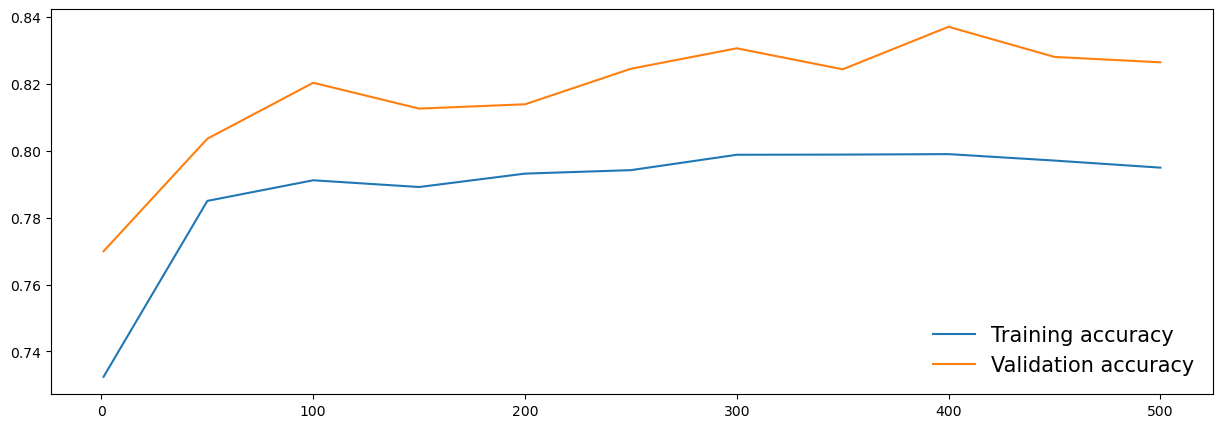

In [67]:
## Plotting the Training accuracy and Validation accuracy for each epoch
fig = plt.figure(figsize=(15, 5))
plt.plot(x_axis, train_acc, label="Training accuracy")
plt.plot(x_axis, dev_acc, label="Validation accuracy")
plt.legend(frameon=False, fontsize=15)
plt.show()

Accuracy: 0.8222222222222222
Precision: 0.7613899613899614
Recall: 0.9435406698564593
F1 Score: 0.8427350427350427
              precision    recall  f1-score   support

           0       0.92      0.70      0.80      1025
           1       0.76      0.94      0.84      1045

    accuracy                           0.82      2070
   macro avg       0.84      0.82      0.82      2070
weighted avg       0.84      0.82      0.82      2070



Text(183.22222222222223, 0.5, 'Truth')

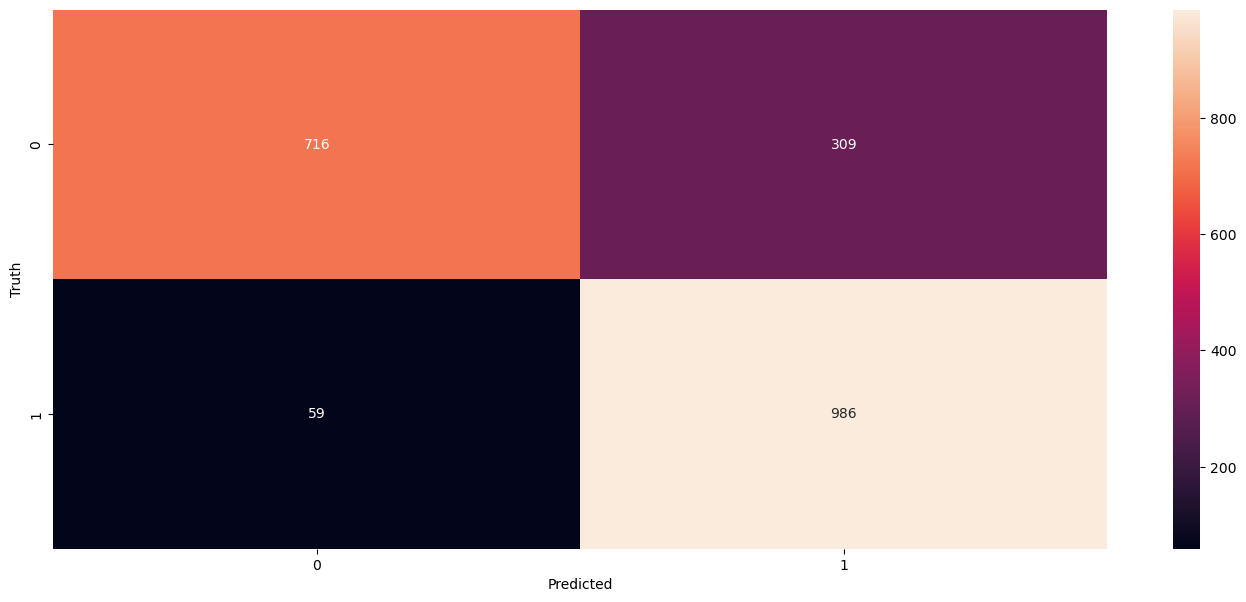

In [75]:
#Printing the Statistical Metrics for the model's performance
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report

model.eval()
test_pred = model(X_test_torch)
test_pred = torch.exp(test_pred)
top_p, top_class_test = test_pred.topk(1, dim=1)

y_test_numpy = y_test_torch.cpu().numpy().flatten()
top_class_test_numpy = top_class_test.cpu().numpy().flatten()


# Calculate accuracy
accuracy = accuracy_score(y_test_numpy, top_class_test_numpy)

# Calculate precision
precision = precision_score(y_test_numpy, top_class_test_numpy)

# Calculate recall
recall = recall_score(y_test_numpy, top_class_test_numpy)

# Calculate F1 score
f1 = f1_score(y_test_numpy, top_class_test_numpy)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


#print classification_report
print(classification_report(y_test_numpy,top_class_test_numpy))
# ploting the confusion metrix plot
conf_mat = tf.math.confusion_matrix(labels=y_test_numpy,predictions=top_class_test_numpy)
plt.figure(figsize = (17,7))
sns.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


##### Experiment 4 - Hyperparameters and  Architecture of the neural network	 
    
* Hidden Layer Sizes	[100, 75, 50, 50]	 
* Dropout Rate	0.2
* Cross Entropy Loss
* Optimizer	Adam with learning rate 0.001	 
* Epochs	500	 
* Batch Size	128	 
* Model Architecture	Layers	Activation

Input	

* Hidden Layer 1	Linear (100 units)	ReLU
* Hidden Layer 2	Linear (75 units)	ReLU
* Hidden Layer 3	Linear (50 units)	ReLU
* Hidden Layer 4	Linear (50 units)	ReLU
* Output	Linear (2 units)	Log-Softmax


In [82]:
#Model definition 
class Classifier(nn.Module):
    #Initialising the model which hidden layers and no of neurons in each of the layer
    def __init__(self, input_size):
        super().__init__()
        self.hidden_1 = nn.Linear(input_size, 100)
        self.hidden_2 = nn.Linear(100, 75)
        self.hidden_3 = nn.Linear(75,50)
        self.hidden_4 = nn.Linear(50,50)
        self.output = nn.Linear(50, 2)
    #Dropout rate for the neurons
        self.dropout = nn.Dropout(p=0.2)
    #Activation function for each layer
    def forward(self, x):
        z = self.dropout(F.relu(self.hidden_1(x)))
        z = self.dropout(F.relu(self.hidden_2(z)))
        z = self.dropout(F.relu(self.hidden_3(z)))
        z = self.dropout(F.relu(self.hidden_4(z)))
        #For the output layer and back propagation we have defined here
        out = F.log_softmax(self.output(z), dim=1)

        return out

In [85]:
#Calling the model defined over here by passing the training dataset
model = Classifier(X_train.shape[1])

#Loss function for the Neural net defined above
criterion = nn.CrossEntropyLoss()

#Adam Optimizer with learning rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=0.001)

#Learning(Train) over 1000 epoch each 128 batches
epochs = 500
batch_size = 128

In [86]:
#This is done for each epoch
#Calculation of loss over train and test
train_losses, dev_losses, train_acc, dev_acc= [], [], [], []
x_axis = []

#Shuffling the input for each epoch so that model doesnt get overtrained
for e in range(1, epochs + 1):
    X_, y_ = shuffle(X_train, y_train)
    running_loss = 0
    running_acc = 0
    iterations = 0
#Mini batches which will be running for the entire batch size
    for i in range(0, len(X_), batch_size):
        iterations += 1
        b = i + batch_size
        #Converting values in the understandable format for the above defined neural net
        X_batch = torch.tensor(X_.iloc[i:b,:].values).float()
        y_batch = torch.tensor(y_.iloc[i:b].values, dtype=torch.long)
        
        #Optimising and back propagate the losses for improving the learning of the neural net over each epoch
        log_ps = model(X_batch)
        loss = criterion(log_ps, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        ##Calculating accuracy, loss for the entire epoch for the batch
        running_loss += loss.item()
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        running_acc += accuracy_score(y_batch, top_class)

    dev_loss = 0
    acc = 0

    # Turn off gradients for validation, saves memory and computations
    with torch.no_grad():
        model.eval()
        log_dev = model(X_dev_torch)
        dev_loss = criterion(log_dev, y_dev_torch)

        ps_dev = torch.exp(log_dev)
        top_p, top_class_dev = ps_dev.topk(1, dim=1)
        acc = accuracy_score(y_dev_torch, top_class_dev)

    model.train()

    #Print output only when the Epoch no is divisible by 50 or is equal to 1
    if e%50 == 0 or e == 1:
        x_axis.append(e)

        train_losses.append(running_loss/iterations)
        dev_losses.append(dev_loss)
        train_acc.append(running_acc/iterations)
        dev_acc.append(acc)

        print("Epoch: {}/{}.. ".format(e, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/iterations),
              "Validation Loss: {:.3f}.. ".format(dev_loss),
              "Training Accuracy: {:.3f}.. ".format(running_acc/iterations),
              "Validation Accuracy: {:.3f}".format(acc))

Epoch: 1/500..  Training Loss: 0.595..  Validation Loss: 0.498..  Training Accuracy: 0.692..  Validation Accuracy: 0.764
Epoch: 50/500..  Training Loss: 0.361..  Validation Loss: 0.332..  Training Accuracy: 0.843..  Validation Accuracy: 0.863
Epoch: 100/500..  Training Loss: 0.295..  Validation Loss: 0.276..  Training Accuracy: 0.872..  Validation Accuracy: 0.892
Epoch: 150/500..  Training Loss: 0.276..  Validation Loss: 0.251..  Training Accuracy: 0.882..  Validation Accuracy: 0.906
Epoch: 200/500..  Training Loss: 0.262..  Validation Loss: 0.244..  Training Accuracy: 0.886..  Validation Accuracy: 0.908
Epoch: 250/500..  Training Loss: 0.249..  Validation Loss: 0.236..  Training Accuracy: 0.894..  Validation Accuracy: 0.909
Epoch: 300/500..  Training Loss: 0.252..  Validation Loss: 0.233..  Training Accuracy: 0.895..  Validation Accuracy: 0.913
Epoch: 350/500..  Training Loss: 0.244..  Validation Loss: 0.231..  Training Accuracy: 0.897..  Validation Accuracy: 0.911
Epoch: 400/500..  T

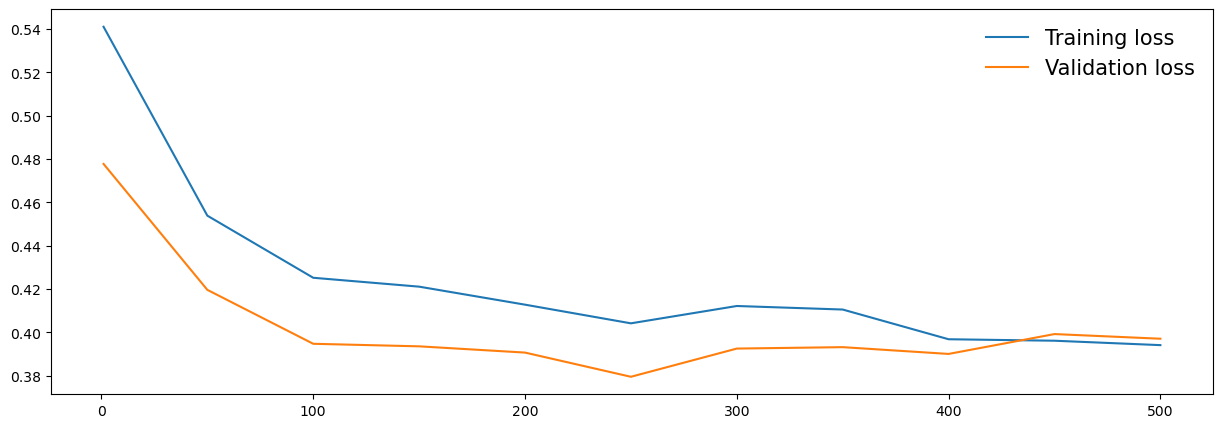

In [79]:
## Plotting the Training Loss and Validation loss for each epoch
fig = plt.figure(figsize=(15, 5))
plt.plot(x_axis,train_losses, label='Training loss')
plt.plot(x_axis, dev_losses, label='Validation loss')
plt.legend(frameon=False, fontsize=15)
plt.show()

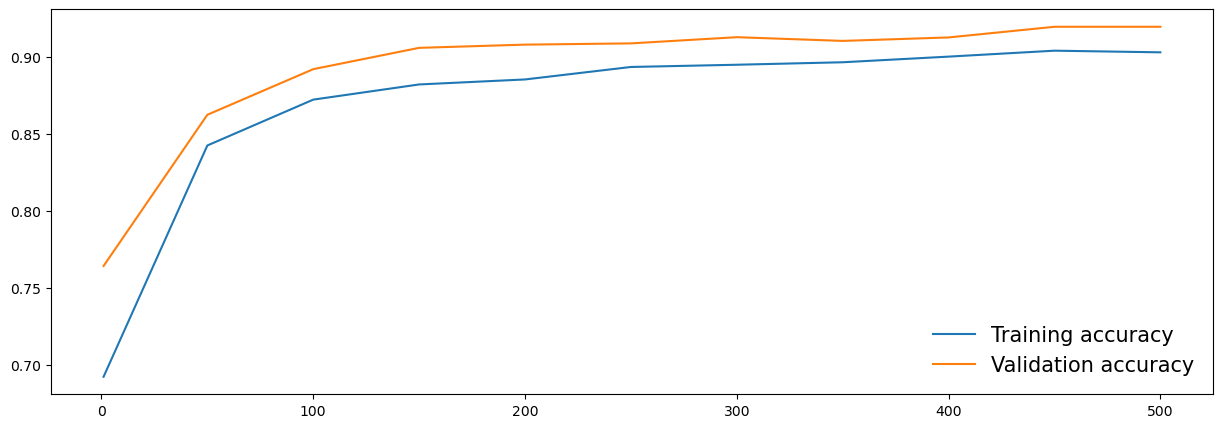

In [87]:
## Plotting the Training accuracy and Validation accuracy for each epoch
fig = plt.figure(figsize=(15, 5))
plt.plot(x_axis, train_acc, label="Training accuracy")
plt.plot(x_axis, dev_acc, label="Validation accuracy")
plt.legend(frameon=False, fontsize=15)
plt.show()

Accuracy: 0.9207729468599034
Precision: 0.8820468343451865
Recall: 0.9732057416267943
F1 Score: 0.9253867151956323
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1025
           1       0.88      0.97      0.93      1045

    accuracy                           0.92      2070
   macro avg       0.93      0.92      0.92      2070
weighted avg       0.93      0.92      0.92      2070



Text(183.22222222222223, 0.5, 'Truth')

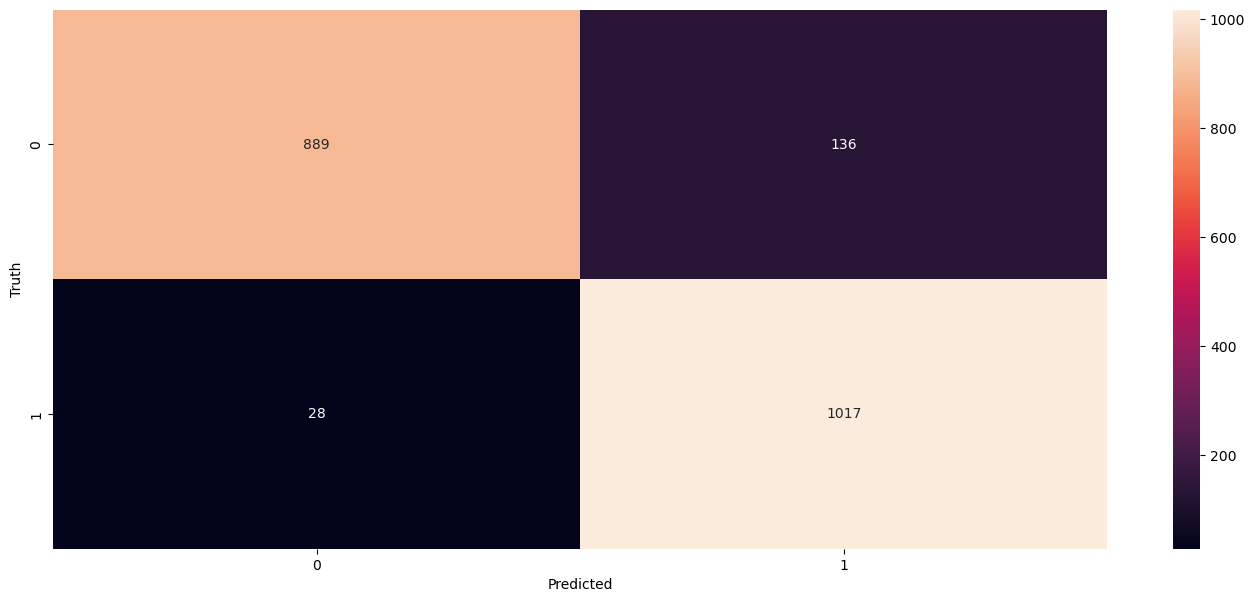

In [88]:
#Printing the Statistical Metrics for the model's performance
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report

model.eval()
test_pred = model(X_test_torch)
test_pred = torch.exp(test_pred)
top_p, top_class_test = test_pred.topk(1, dim=1)

y_test_numpy = y_test_torch.cpu().numpy().flatten()
top_class_test_numpy = top_class_test.cpu().numpy().flatten()


# Calculate accuracy
accuracy = accuracy_score(y_test_numpy, top_class_test_numpy)

# Calculate precision
precision = precision_score(y_test_numpy, top_class_test_numpy)

# Calculate recall
recall = recall_score(y_test_numpy, top_class_test_numpy)

# Calculate F1 score
f1 = f1_score(y_test_numpy, top_class_test_numpy)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


#print classification_report
print(classification_report(y_test_numpy,top_class_test_numpy))
# ploting the confusion metrix plot
conf_mat = tf.math.confusion_matrix(labels=y_test_numpy,predictions=top_class_test_numpy)
plt.figure(figsize = (17,7))
sns.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


##### Experiment 5 - Hyperparameters and  Architecture of the neural network	 
    
* Hidden Layer Sizes	[100, 75, 50, 50]	 
* Dropout Rate	0.2
* Cross Entropy Loss
* Optimizer	RMSProp with learning rate 0.001	 
* Epochs	500	 
* Batch Size	128	 
* Model Architecture	Layers	Activation

Input	

* Hidden Layer 1	Linear (100 units)	ReLU
* Hidden Layer 2	Linear (75 units)	ReLU
* Hidden Layer 3	Linear (50 units)	ReLU
* Hidden Layer 4	Linear (50 units)	ReLU
* Output	Linear (2 units)	Log-Softmax


In [89]:
#Model definition 
class Classifier(nn.Module):
    #Initialising the model which hidden layers and no of neurons in each of the layer
    def __init__(self, input_size):
        super().__init__()
        self.hidden_1 = nn.Linear(input_size, 100)
        self.hidden_2 = nn.Linear(100, 75)
        self.hidden_3 = nn.Linear(75,50)
        self.hidden_4 = nn.Linear(50,50)
        self.output = nn.Linear(50, 2)
    #Dropout rate for the neurons
        self.dropout = nn.Dropout(p=0.2)
    #Activation function for each layer
    def forward(self, x):
        z = self.dropout(F.relu(self.hidden_1(x)))
        z = self.dropout(F.relu(self.hidden_2(z)))
        z = self.dropout(F.relu(self.hidden_3(z)))
        z = self.dropout(F.relu(self.hidden_4(z)))
        #For the output layer and back propagation we have defined here
        out = F.log_softmax(self.output(z), dim=1)

        return out

In [90]:
#Calling the model defined over here by passing the training dataset
model = Classifier(X_train.shape[1])

#Loss function for the Neural net defined above
criterion = nn.CrossEntropyLoss()

#Adam Optimizer with learning rate = 0.001
optimizer = optim.RMSprop(model.parameters(), lr=0.001)


#Learning(Train) over 1000 epoch each 128 batches
epochs = 500
batch_size = 128

In [91]:
#This is done for each epoch
#Calculation of loss over train and test
train_losses, dev_losses, train_acc, dev_acc= [], [], [], []
x_axis = []

#Shuffling the input for each epoch so that model doesnt get overtrained
for e in range(1, epochs + 1):
    X_, y_ = shuffle(X_train, y_train)
    running_loss = 0
    running_acc = 0
    iterations = 0
#Mini batches which will be running for the entire batch size
    for i in range(0, len(X_), batch_size):
        iterations += 1
        b = i + batch_size
        #Converting values in the understandable format for the above defined neural net
        X_batch = torch.tensor(X_.iloc[i:b,:].values).float()
        y_batch = torch.tensor(y_.iloc[i:b].values, dtype=torch.long)
        
        #Optimising and back propagate the losses for improving the learning of the neural net over each epoch
        log_ps = model(X_batch)
        loss = criterion(log_ps, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        ##Calculating accuracy, loss for the entire epoch for the batch
        running_loss += loss.item()
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        running_acc += accuracy_score(y_batch, top_class)

    dev_loss = 0
    acc = 0

    # Turn off gradients for validation, saves memory and computations
    with torch.no_grad():
        model.eval()
        log_dev = model(X_dev_torch)
        dev_loss = criterion(log_dev, y_dev_torch)

        ps_dev = torch.exp(log_dev)
        top_p, top_class_dev = ps_dev.topk(1, dim=1)
        acc = accuracy_score(y_dev_torch, top_class_dev)

    model.train()

    #Print output only when the Epoch no is divisible by 50 or is equal to 1
    if e%50 == 0 or e == 1:
        x_axis.append(e)

        train_losses.append(running_loss/iterations)
        dev_losses.append(dev_loss)
        train_acc.append(running_acc/iterations)
        dev_acc.append(acc)

        print("Epoch: {}/{}.. ".format(e, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/iterations),
              "Validation Loss: {:.3f}.. ".format(dev_loss),
              "Training Accuracy: {:.3f}.. ".format(running_acc/iterations),
              "Validation Accuracy: {:.3f}".format(acc))

Epoch: 1/500..  Training Loss: 0.534..  Validation Loss: 0.482..  Training Accuracy: 0.739..  Validation Accuracy: 0.771
Epoch: 50/500..  Training Loss: 0.357..  Validation Loss: 0.328..  Training Accuracy: 0.841..  Validation Accuracy: 0.864
Epoch: 100/500..  Training Loss: 0.309..  Validation Loss: 0.277..  Training Accuracy: 0.863..  Validation Accuracy: 0.889
Epoch: 150/500..  Training Loss: 0.290..  Validation Loss: 0.254..  Training Accuracy: 0.874..  Validation Accuracy: 0.907
Epoch: 200/500..  Training Loss: 0.273..  Validation Loss: 0.242..  Training Accuracy: 0.883..  Validation Accuracy: 0.910
Epoch: 250/500..  Training Loss: 0.252..  Validation Loss: 0.236..  Training Accuracy: 0.895..  Validation Accuracy: 0.913
Epoch: 300/500..  Training Loss: 0.251..  Validation Loss: 0.228..  Training Accuracy: 0.895..  Validation Accuracy: 0.915
Epoch: 350/500..  Training Loss: 0.247..  Validation Loss: 0.229..  Training Accuracy: 0.900..  Validation Accuracy: 0.919
Epoch: 400/500..  T

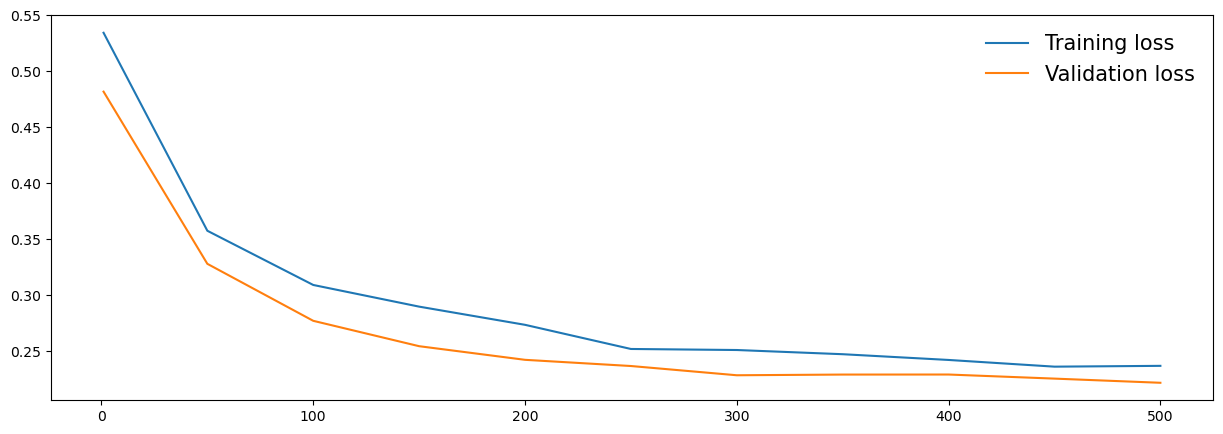

In [92]:
## Plotting the Training Loss and Validation loss for each epoch
fig = plt.figure(figsize=(15, 5))
plt.plot(x_axis,train_losses, label='Training loss')
plt.plot(x_axis, dev_losses, label='Validation loss')
plt.legend(frameon=False, fontsize=15)
plt.show()

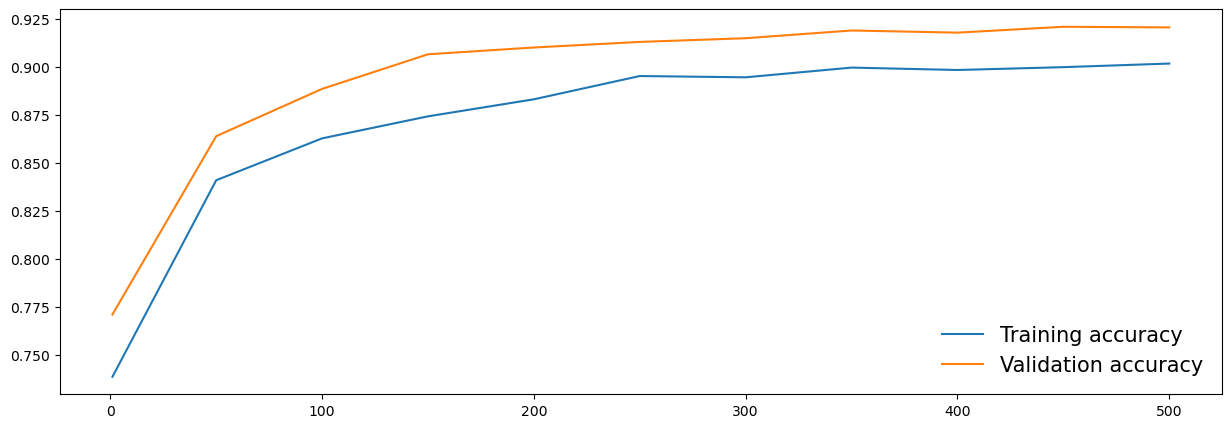

In [93]:
## Plotting the Training accuracy and Validation accuracy for each epoch
fig = plt.figure(figsize=(15, 5))
plt.plot(x_axis, train_acc, label="Training accuracy")
plt.plot(x_axis, dev_acc, label="Validation accuracy")
plt.legend(frameon=False, fontsize=15)
plt.show()

Accuracy: 0.9265700483091788
Precision: 0.8872506504770165
Recall: 0.9789473684210527
F1 Score: 0.9308462238398545
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1025
           1       0.89      0.98      0.93      1045

    accuracy                           0.93      2070
   macro avg       0.93      0.93      0.93      2070
weighted avg       0.93      0.93      0.93      2070



Text(183.22222222222223, 0.5, 'Truth')

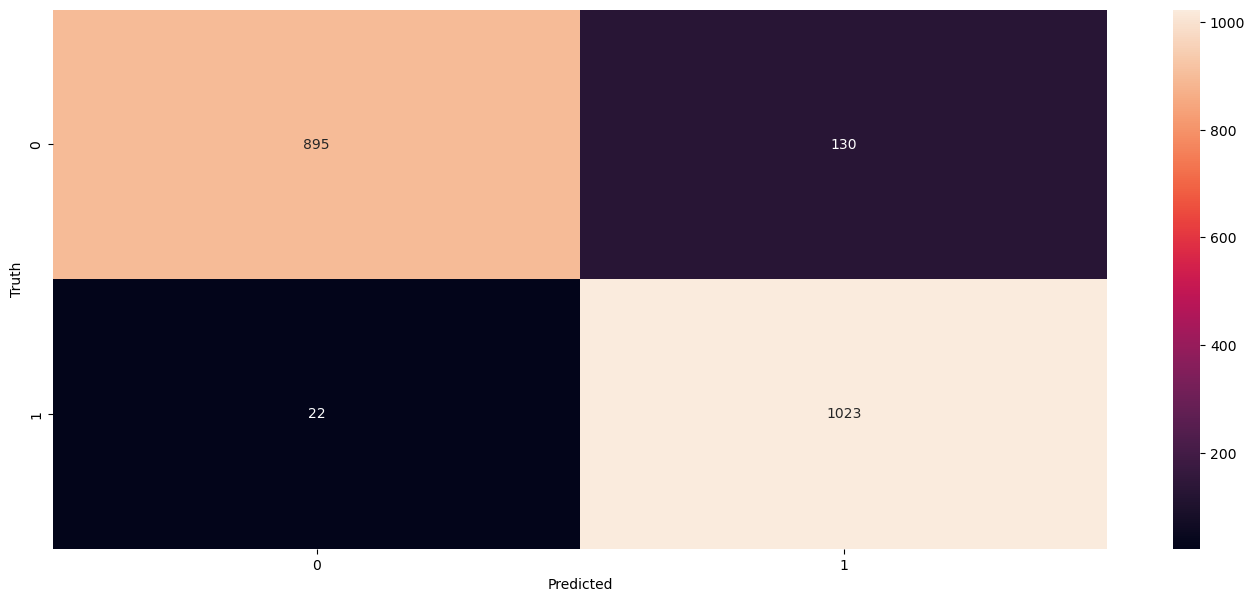

In [94]:
#Printing the Statistical Metrics for the model's performance
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report

model.eval()
test_pred = model(X_test_torch)
test_pred = torch.exp(test_pred)
top_p, top_class_test = test_pred.topk(1, dim=1)

y_test_numpy = y_test_torch.cpu().numpy().flatten()
top_class_test_numpy = top_class_test.cpu().numpy().flatten()


# Calculate accuracy
accuracy = accuracy_score(y_test_numpy, top_class_test_numpy)

# Calculate precision
precision = precision_score(y_test_numpy, top_class_test_numpy)

# Calculate recall
recall = recall_score(y_test_numpy, top_class_test_numpy)

# Calculate F1 score
f1 = f1_score(y_test_numpy, top_class_test_numpy)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


#print classification_report
print(classification_report(y_test_numpy,top_class_test_numpy))
# ploting the confusion metrix plot
conf_mat = tf.math.confusion_matrix(labels=y_test_numpy,predictions=top_class_test_numpy)
plt.figure(figsize = (17,7))
sns.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


### 6.Summary

Answered in the Report